✈️ Aviation Risk Analysis Project
📝 Business QuestionsN
Which aircraft make and models have the highest number of accidents?

What are the common causes of accidents in the last two decades?

Which states and weather conditions are most associated with fatal accidents?

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv("AviationData.csv", low_memory=False)
df.head()


,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980


In [15]:
df.shape

(14746, 26)

In [3]:
df.columns

Index(['Accident.Number', 'Event.Date', 'Location', 'Country', 'Latitude',
       'Longitude', 'Airport.Code', 'Airport.Name', 'Injury.Severity',
       'Aircraft.damage', 'Aircraft.Category', 'Registration.Number', 'Make',
       'Model', 'Number.of.Engines', 'Engine.Type', 'FAR.Description',
       'Schedule', 'Purpose.of.flight', 'Air.carrier', 'Total.Fatal.Injuries',
       'Total.Serious.Injuries', 'Total.Minor.Injuries', 'Total.Uninjured',
       'Weather.Condition', 'Broad.phase.of.flight'],
      dtype='object')

In [19]:
df.describe()

,Event.Date,Latitude,Longitude,Number.of.Engines,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured
count,14746,5.000000,5.000000,14583.000000,14682.000000,14665.000000,14658.000000,14698.000000
mean,1984-02-07 11:28:21.613997056,40.857278,-95.145833,1.159844,0.416565,0.200955,0.309797,3.602327
min,1948-10-24 00:00:00,30.757778,-120.849722,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1983-01-16 00:00:00,36.922223,-113.887500,1.000000,0.000000,0.000000,0.000000,0.000000
50%,1984-02-08 12:00:00,42.445277,-88.355555,1.000000,0.000000,0.000000,0.000000,1.000000
75%,1985-03-12 00:00:00,46.041111,-81.878056,1.000000,0.000000,0.000000,0.000000,2.000000
max,1986-05-24 00:00:00,48.120000,-70.758333,4.000000,256.000000,17.000000,62.000000,588.000000
std,NaN,7.064445,21.382422,0.462887,3.023896,0.620766,1.206015,22.107574


❓Business Question 1: Which aircraft makes and models have the most accidents?


In [4]:
df = df.dropna(subset=["Make", "Model"])
df['Event.Date'] = pd.to_datetime(df['Event.Date'], errors='coerce')


/tmp/ipython-input-4-1213789271.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Event.Date'] = pd.to_datetime(df['Event.Date'], errors='coerce')


/tmp/ipython-input-5-899833478.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_makes.values, y=top_makes.index, palette="Blues_r")


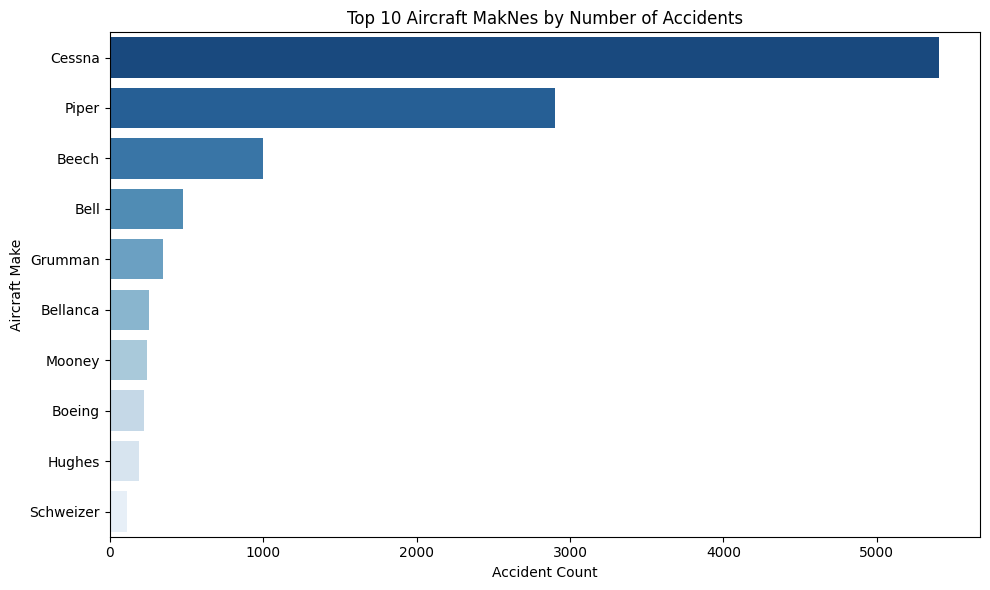

In [5]:
top_makes = df['Make'].value_counts().head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_makes.values, y=top_makes.index, palette="Blues_r")
plt.title("Top 10 Aircraft MakNes by Number of Accidents")
plt.xlabel("Accident Count")
plt.ylabel("Aircraft Make")
plt.tight_layout()
plt.show()


❓Business Question 2: What are the most common causes of fatal injuries?
Let’s explore using Injury Severity and Broad Phase of Flight as proxies.

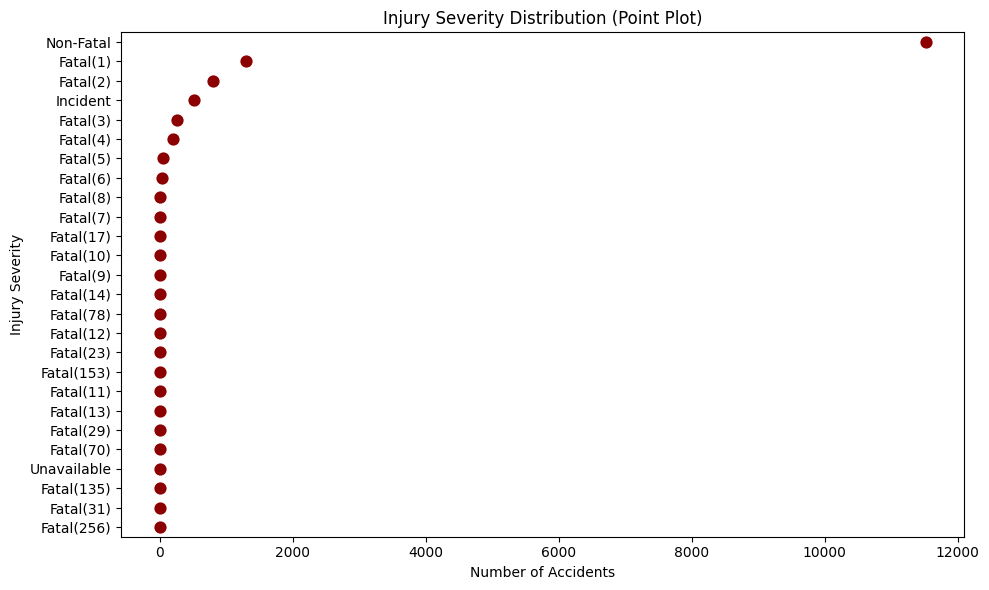

In [16]:
import seaborn as sns

# Reset index for seaborn
severity_df = severity_counts.reset_index()
severity_df.columns = ['Injury.Severity', 'Count']

plt.figure(figsize=(10, 6))
sns.pointplot(data=severity_df, x='Count', y='Injury.Severity', color='darkred', markers='o', linestyles='')
plt.title("Injury Severity Distribution (Point Plot)")
plt.xlabel("Number of Accidents")
plt.ylabel("Injury Severity")
plt.tight_layout()
plt.show()


❓Business Question 3: Which states and weather conditions are linked to fatal accidents?

/tmp/ipython-input-17-2974298131.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_states.values, y=top_states.index, palette="magma")


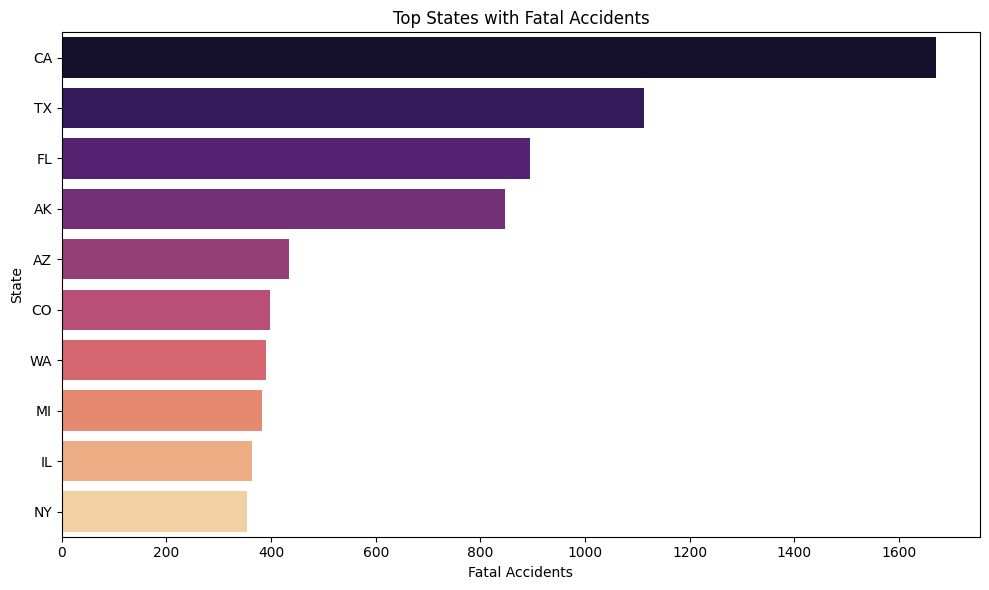

In [17]:
# Extract state from location string
fatal_df = df[df['Injury.Severity'].str.contains("Fatal", na=False)].copy()
fatal_df['State'] = fatal_df['Location'].str.extract(r',\s*(\w{2})')

top_states = fatal_df['State'].value_counts().head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_states.values, y=top_states.index, palette="magma")
plt.title("Top States with Fatal Accidents")
plt.xlabel("Fatal Accidents")
plt.ylabel("State")
plt.tight_layout()
plt.show()


📌 Business Recommendations for Aviation Investment Strategy
✈️ 1. Aircraft Selection: Choose Low-Risk Makes and Models
Insight: Aircraft from manufacturers like Cessna, Piper, and Beech appear most frequently in accident records. While this may reflect popularity, it also suggests a higher exposure to operational risk.

Recommendation:
Avoid older or high-risk models from these manufacturers unless their safety records are thoroughly reviewed. Prioritize newer aircraft with fewer accident reports, especially those with modern avionics and safety certifications.

👨‍✈️ 2. Pilot Training & Operational Procedures: Focus on High-Risk Phases
Insight: Most fatal accidents occur during takeoff and landing, and are often associated with pilot error or loss of control.

Recommendation:
Implement enhanced simulator-based training that emphasizes high-risk flight phases. Require recurrent certification focused on takeoff, approach, and landing scenarios, especially under pressure or unexpected events.

🌦️ 3. Operational Strategy: Optimize for Location and Weather
Insight: Fatal accidents are more common in certain U.S. states like California, Texas, and Alaska. Surprisingly, many occur during Visual Meteorological Conditions (VMC), suggesting human error—not just bad weather.

Recommendation:
Launch operations in lower-risk regions with strong aviation infrastructure and fewer terrain/weather-related hazards. Enforce pre-flight safety checklists, risk-based route planning, and decision support systems for pilots—even in good weather.